# Analysis of Brazilian Higher Education Data
### (Part 1 - Data Extraction)

<b>Date:</b> 01/09/2020

<b>Author:</b> Cardoso, Thiago (thiago.guimaraesdf10@gmail.com)

<b>Project Description:</b> This study seek to organize and develop basic analisis of higher educational data disponible for brazilian public and private universities. At first place, this study is a first data science project and therefore far from being a repository of best practice. Any sugestion to improve the project organization and descriptions are welcome. .

This study is dividived in 3 (theere jupyter notebooks), related to the following parts:

* Part 1 - Data Extraction: Download of all data used in the project.

* Part 2 - Data Cleaning: Cleaning and organization of databases to be used in Data Analisis

* Part 3 - Data Analisis: Exploration of Higher Education Census and Quality Index dividied in 6 sections: i) Hisotirico de matriculas por ano, por curso, área geográfica, genero e raça, entre outros aspectos; ii) 

<b>This notebook is related to Part 1</b>

There is also a medium post with a sintax of the complete work

<b>Important issues:</b>

- English is not my motherlanguage. Sorry for mistakes.
- Many (maybe most) codelines lack consistence, perfomance and effience. Did my best to conciliate produtivy and code quality. Any sugestion to improve code lines are welcome. 
- The Analisis only scracht the surface of possibilietes, considering the huge ammount of disponible information. ENADE data are very rich in student informant (specially it's questionaries) and the Higher Education Census provides a amplo framework of brazilian higher education system. Any author seeking to further the analisis employed here, fell free to contact me. I can also help with any translation issue and provide information for additional souces of data in Brazil.

## Library Import

In [4]:

import os
import shutil
import time
from os import path

import webbrowser
import xlsxwriter
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium

%matplotlib inline


    import os
    import webbrowser
    import time
    from os import path

## Brazilian Higher Education Census - 1995 to 2018

<b>Data from brazilian public and private higher education institutes are colleted and organized by the <a href="http://inep.gov.br/web/guest/about-inep">"National Institute for Educational Studies and Research Anísio Teixeira (INEP)"</a>.</b> Since 2009, INEP publishes the Higher Education Census microdata at student, teacher, course and institution level. Here is a brief description of the Higher Education Census provided by INEP:

    Annually, this initiative collects data on higher education in the country, including graduate and sequential courses – both attendance and distance learning courses, providing a "radiography" of this educational level.

    Higher education institutions fill out the census online forms and, based on this data, provide policy makers with an overview of educational policy trends. By collecting data regarding the number of enrollment and graduates, candidates to university entrance; information on faculty – by qualifications and contract nature – as well as on administrative and support staff; financial data and infrastructure, this initiative provides valuable information about an educational level that is perceived to be in a process of expanding and diversifying."

From 1995 to 2008, INEP publised data only at course and institution level.

In this study we focus on extracting, cleaning and analising data from 2009 - 2018. Futher work needs to be made in order to padronize 1995 to 2008 data. 

The code bellow download all Higher Education Census files, from 1995 to 2018, from INEP website one at a time.

In [ ]:
# Data extration (Higher Education Census)

# Files names are in different formats:
#
# - 1995 to 2008 and 2017 to 2018 files are named microdados_educacao_superior_YEAR.zip
# - 2009 to 2016 files are named microdados_censo_superior_YEAR.zip
#
# At this date (16/08/2020) all files can be found in http://download.inep.gov.br/microdados

years = list(range(1995,2008))
years.extend([2017,2018])

for y in years:
    
    webbrowser.open("http://download.inep.gov.br/microdados/microdados_educacao_superior_" + str(y) + ".zip")
    
    while not os.path.exists("C:/Users/Thiago/Downloads/microdados_educacao_superior_" + str(y) + ".zip"):
         time.sleep(1)
            
    if os.path.isfile("C:/Users/Thiago/Downloads/microdados_educacao_superior_" + str(y) + ".zip"):
        continue

for y in range(2009,2016):
  
    webbrowser.open("http://download.inep.gov.br/microdados/microdados_censo_superior_" + str(y) + ".zip")
    
    while not os.path.exists("C:/Users/Thiago/Downloads/microdados_censo_superior_" + str(y) + ".zip"):
         time.sleep(1)
            
    if os.path.isfile("C:/Users/Thiago/Downloads/microdados_censo_superior_" + str(y) + ".zip"):
        continue  

## National Assessment of Student Achievement (ENADE) - 2004 to 2018

<b>ENADE is a external evalution applied annually to assess undergraduate students learning at their final year.</b> Each course is assessed every three years, since programs are grouped in three representative areas and each year one group is assessed. 

ENADE microdata provides information at student level (unidentified), regarding each students ansewrs and results in the content assessment and also its response to a socioeconomic and course quality perception questionary. 

The code bellow download all ENADE files, from 2004 to 2018, from INEP website one at a time.

In [ ]:
# Data extration (ENADE)

years = list(range(2004,2016))
years.extend([2018])

for y in years:  
    webbrowser.open("http://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_" + str(y) + ".zip")    
    while not os.path.exists("C:/Users/Thiago/Downloads/microdados_enade_" + str(y) + ".zip"):
         time.sleep(1)           
    if os.path.isfile("C:/Users/Thiago/Downloads/microdados_enade_" + str(y) + ".zip"):
        continue

webbrowser.open("http://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2016_versao_28052018.zip")       
webbrowser.open("http://download.inep.gov.br/microdados/Enade_Microdados/microdados_Enade_2017_portal_2018.10.09.zip")       

## Preliminar Cource concept (CPC)

<b>CPC is an index, ranging from 1 to 5, calculed by INEP to assess undergraduation courses quality.</b>.

For this analisis, only 2009 and 2018 CPC data is used. The 2018 CPC is calculated according to the following aspects and weights: 20% - Students performance in ENADE, 35% - Dif between expected and observed performance in ENADE (expected performance is calculated considing perfomance in courses with similiar students background), 7,5% - Proportion of teachers with MA degree, 15% - Proportion of teachers with Ph.D degree, 7,5% - Teachers work regime, 15% - Teachers perception regarding infraestructure, pedagogical organizatioin and opportunies to improvel academic and professional formation.

2009 CPC has slight variations in some aspects weight

CPC data from 2010 to 2017 can be found <a href='http://inep.gov.br/web/guest/educacao-superior/indicadores-de-qualidade/resultados'>here</a>

Further information for the CPC can be found <a href='http://inep.gov.br/web/guest/educacao-superior/indicadores-de-qualidade/indice-geral-de-cursos-igc-'>here</a>

In [ ]:
# CPC 2009
webbrowser.open("http://download.inep.gov.br/download/enade/2009/cpc_decomposto_2009.xls")    
while not os.path.exists("C:/Users/Thiago/Downloads/cpc_decomposto_2009.xls"):
    time.sleep(1)            
if os.path.isfile("C:/Users/Thiago/Downloads/cpc_decomposto_2009.xls"):
    continue
    
# CPC 2019
webbrowser.open("http://download.inep.gov.br/educacao_superior/igc_cpc/2018/portal_CPC_edicao2018.xlsx")    
while not os.path.exists("C:/Users/Thiago/Downloads/portal_CPC_edicao2018.xlsx"):
    time.sleep(1)            
if os.path.isfile("C:/Users/Thiago/Downloads/portal_CPC_edicao2018.xlsx"):
    continue
    

## General Course Index (IGC)

The IGC provides a quality index for higher education instituion based on avarege CPC of the last three years, the distribution of students between undegrad and graduate levels and the evarage evaluation of graduation courses.

More information about the IGC can be found <a href="http://inep.gov.br/web/guest/educacao-superior/indicadores-de-qualidade/indice-geral-de-cursos-igc-">here</a> 

In [ ]:
webbrowser.open("http://download.inep.gov.br/download/areaigc/Downloads/igc_2009.xls")
webbrowser.open("http://download.inep.gov.br/educacao_superior/enade/igc/tabela_igc_2010_16_10_2012.xls" )
webbrowser.open("http://download.inep.gov.br/educacao_superior/enade/igc/tabela_igc_2011_15_01_2013.xls")
webbrowser.open("http://download.inep.gov.br/educacao_superior/enade/igc/tabela_igc_2012_30012014.xls" )
webbrowser.open("http://download.inep.gov.br/educacao_superior/enade/igc/2013/igc_2013_09022015.xlsx")
webbrowser.open("http://download.inep.gov.br/educacao_superior/enade/igc/2014/igc_2014.xlsx")
webbrowser.open("http://download.inep.gov.br/educacao_superior/indicadores/legislacao/2017/igc_2015_portal_04_12_2017.xlsx")
webbrowser.open("http://download.inep.gov.br/educacao_superior/igc_cpc/2016/resultado_igc_2016_11042018.xlsx")
webbrowser.open("http://download.inep.gov.br/educacao_superior/igc_cpc/2018/resultado_igc_2017.xlsx")
webbrowser.open("http://download.inep.gov.br/educacao_superior/igc_cpc/2018/portal_IGC_edicao2018.xlsx")

## Data Organization

A manual work had to be employed in order to organize and padronize files names. There are an huge variety in zip files folders paths, file names and formats across years.

In this manual process of data organization, the following file names were choosen:

* For HEC data:
student level files: alunos_'year';
course level files: cursos_'year';
university level files: ies_'year'

* For IGC data: igc_'year'

* For CPC data cpc_'year'

All files are placed in 'data/csv_bases'

In [ ]:
# Create new directory to keep the Project files

# Important: Run only once

os.chdir("C:/Users/Thiago/Documents/DataScience")
os.mkdir("Projeto_A")
os.mkdir("Projeto_A/DADOS")

In [ ]:
# Data Organization (cont.)

os.chdir("C:/Users/Thiago/Downloads")

# Rename files to keep same name pattern

for y in range(2009,2016):
    os.rename("microdados_censo_superior_" + str(y) + ".zip","microdados_educacao_superior_" + str(y) + ".zip")

# Copy files to the project directory

files = []

for y in range(1995,2019):    
    files.append("microdados_educacao_superior_" + str(y) + ".zip")

for f in files:
    shutil.copy(f, 'C:/Users/Thiago/Documents/DataScience/Projeto_A/DADOS')
    
# Delete files from Downloads folder and compacted files from Project folder

for y in range(1995,2019):
    os.remove("microdados_educacao_superior_" + str(y) + ".zip")





In [ ]:
# Extract zip files

# TO DO list
# 1 - Create a loop to identify all zip files in the directory and extract then to the same directory

for y in range(1995,2019):
    with zipfile.ZipFile('C:/Users/Thiago/Documents/DataScience/Projeto_A/DADOS/microdados_educacao_superior_' + str(y) +'.zip', 'r') as zip_ref:
        zip_ref.extractall('C:/Users/Thiago/Documents/DataScience/Projeto_A/DADOS')
    

In [ ]:
# Toda organização e padrnozaição das bases de dados foi realizada de forma manual, em função do diferentes padrões de filenames.

In [6]:
# Defining directory

define_dir = "C:/Users/Thiago/Documents/DataScience/Projeto_A"

os.chdir(define_dir)

In [8]:
cursos = pd.read_csv('data/cursos.csv', low_memory = False)

# Create categorical variable for private/public schools

cursos['NM_CATEGORIA_ADMINISTRATIVA'] = 'PRIVADA'

cursos['NM_CATEGORIA_ADMINISTRATIVA'].loc[(cursos['CO_CATEGORIA_ADMINISTRATIVA'] < 4)] = 'PUBLICA'

# keep only undergrad courses

cursos = cursos[cursos['CO_GRAU_ACADEMICO'] == 1]


cursos["NU_ANO"] = cursos["NU_ANO"].astype(str)

ANO = cursos.groupby(['NU_ANO','NM_CATEGORIA_ADMINISTRATIVA','CO_OCDE_AREA_GERAL'])['QT_INGRESSO_CURSO'].sum().to_frame()
ANO.reset_index(level=[0,1,2], inplace=True)
ANO['GRUPO'] = 'INGRESSO'
ANO = ANO.rename(columns={"QT_INGRESSO_CURSO" : "TOTAL_ANO"})

CONCLUINTES = cursos.groupby(['NU_ANO','NM_CATEGORIA_ADMINISTRATIVA','CO_OCDE_AREA_GERAL'])['QT_CONCLUINTE_CURSO'].sum().to_frame()
CONCLUINTES.reset_index(level=[0,1,2], inplace=True)
CONCLUINTES['GRUPO'] = 'CONCLUINTES'
CONCLUINTES = CONCLUINTES.rename(columns={"QT_CONCLUINTE_CURSO" : "TOTAL_ANO"})

ANO = ANO.append([CONCLUINTES])
ANO['CO_OCDE_AREA_GERAL'].unique()

C:\Users\Thiago\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


array([1., 2., 3., 4., 5., 6., 7., 8.])

In [14]:
# questões: comparar enter redes
# manter apenas graduação
# comparar entre áreas

nome_areas = pd.read_csv('data/nome_areas.csv')
nome_areas.head()
ANO['CO_OCDE_AREA_GERAL'] = ANO['CO_OCDE_AREA_GERAL'].astype(int)

ANO = pd.merge(ANO,nome_areas,how='inner',on=['CO_OCDE_AREA_GERAL'])

MemoryError: Unable to allocate 290. GiB for an array with shape (38963243376,) and data type int64

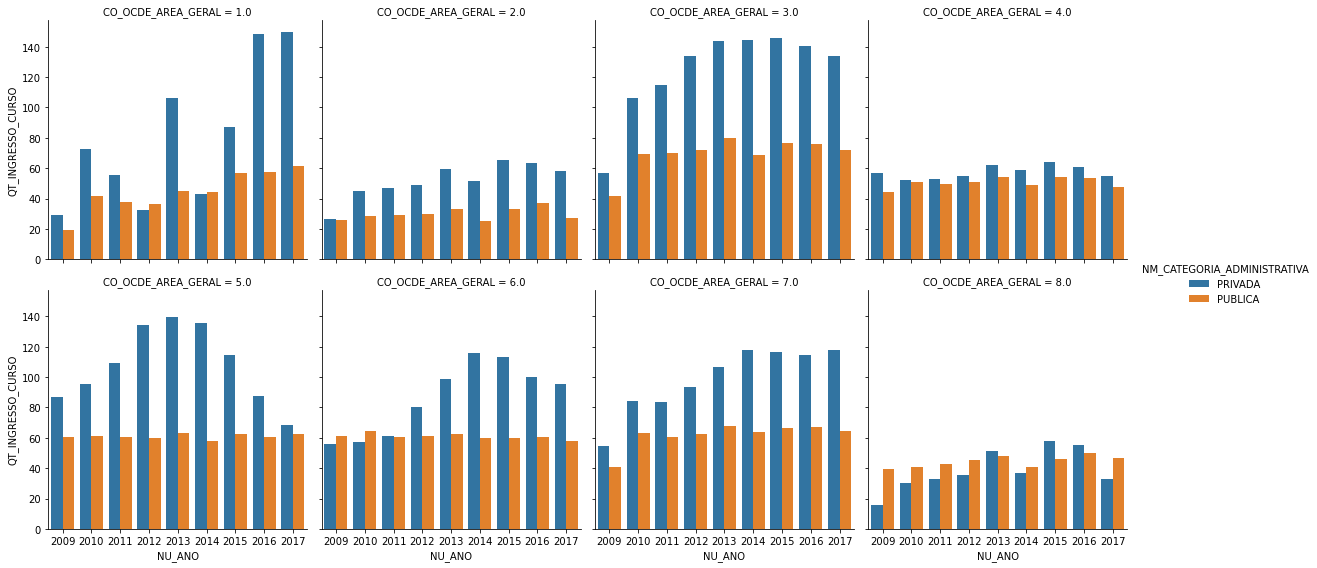

In [15]:
cursos = pd.read_csv('data/cursos.csv', low_memory = False)

# Create categorical variable for private/public schools

cursos['NM_CATEGORIA_ADMINISTRATIVA'] = 'PRIVADA'

cursos['NM_CATEGORIA_ADMINISTRATIVA'].loc[(cursos['CO_CATEGORIA_ADMINISTRATIVA'] < 4)] = 'PUBLICA'

# keep only undergrad courses

cursos = cursos[cursos['CO_GRAU_ACADEMICO'] == 1]

cursos["NU_ANO"] = cursos["NU_ANO"].astype(str)

sns.catplot(x="NU_ANO",y="QT_INGRESSO_CURSO",hue="NM_CATEGORIA_ADMINISTRATIVA",data = cursos.loc[(cursos["CO_OCDE_AREA_DETALHADA"]>0)], col="CO_OCDE_AREA_GERAL", kind="bar",ci=None, col_wrap=4,
                height=4, aspect=1);

cursos = cursos.loc[(cursos["CO_OCDE_AREA_DETALHADA"]>0)]

In [42]:
# Criar variável para ano de início de funcionamento dos cursos

cursos['ANO_INICIO'] = cursos['DT_INICIO_FUNCIONAMENTO'].str[-4:]

# Criar variável para categoria administrativa de curso superior

cursos['TP_CATEGORIA'] = 'PRIVADA'

cursos['TP_CATEGORIA'].loc[(cursos['TP_CATEGORIA_ADMINISTRATIVA'] < 4)] = 'PUBLICA'

# Manter apenas cursos de graduação

cursos = cursos[cursos['TP_NIVEL_ACADEMICO'] == 1]

cursos['ANO_INICIO'].describe()

C:\Users\Thiago\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


count     35629
unique      136
top        2009
freq       2169
Name: ANO_INICIO, dtype: object

,ANO_INICIO,CO_MUNICIPIO
0,1808,2
1,1811,1
2,1816,1
3,1820,1
4,1828,2


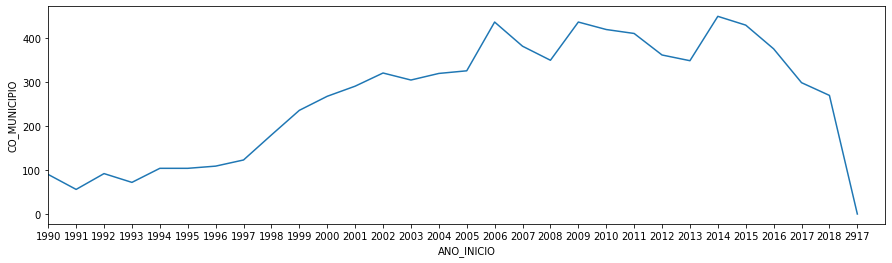

In [9]:
# Total de municípios com cursos novos por ano

MunicipiosporAno = cursos.groupby('ANO_INICIO')['CO_MUNICIPIO'].nunique().to_frame()

MunicipiosporAno.reset_index(level=0, inplace=True)

plt.figure(figsize=(15,4))
sns.lineplot(x=MunicipiosporAno['ANO_INICIO'], y=MunicipiosporAno['CO_MUNICIPIO'])
plt.xlim(106, 136)

In [ ]:
# Total de cursos x por ano x por rede

# Obs: juntar os dois gráficos em único

HistCursos_Privada = cursos[cursos['TP_CATEGORIA']=='PRIVADA'].groupby('ANO_INICIO')['CO_CURSO'].nunique().to_frame()
HistCursos_Publica = cursos[cursos['TP_CATEGORIA']=='PUBLICA'].groupby('ANO_INICIO')['CO_CURSO'].nunique().to_frame()

HistCursos_Publica.reset_index(level=0, inplace=True)
HistCursos_Privada.reset_index(level=0, inplace=True)

plt.figure(figsize=(15,4))
sns.lineplot(x=HistCursos_Publica['ANO_INICIO'], y=HistCursos_Publica['CO_CURSO'])
plt.xlim(106, 136)
plt.axvline(129, color='r')
plt.axvline(125, color='r')
plt.axvline(121, color='r')

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(x=HistCursos_Privada['ANO_INICIO'], y=HistCursos_Privada['CO_CURSO'])
plt.xlim(59, 87)

In [ ]:
# Total de vagas x por ano x por rede

QuantVagasAbertas_Privada = cursos[cursos['TP_CATEGORIA']=='PRIVADA'].groupby('ANO_INICIO')['QT_VAGA_TOTAL'].sum().to_frame()
QuantVagasAbertas_Publica = cursos[cursos['TP_CATEGORIA']=='PUBLICA'].groupby('ANO_INICIO')['QT_VAGA_TOTAL'].sum().to_frame()

QuantVagasAbertas_Publica.reset_index(level=0, inplace=True)
QuantVagasAbertas_Privada.reset_index(level=0, inplace=True)

plt.figure(figsize=(15,4))
sns.lineplot(x=QuantVagasAbertas_Publica['ANO_INICIO'], y=QuantVagasAbertas_Publica['QT_VAGA_TOTAL'])
plt.xlim(106, 136)

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(x=QuantVagasAbertas_Privada['ANO_INICIO'], y=QuantVagasAbertas_Privada['QT_VAGA_TOTAL'])
plt.xlim(59, 87)

In [ ]:
# Ano de fundação dos primeiros cursos públicos e privados por municipio

AnoPrimeiroCurso_Municipio = pd.DataFrame({'CO_MUNICIPIO' : cursos['CO_MUNICIPIO'],
                       'ANO_INICIO' : cursos['ANO_INICIO']})

AnoPrimeiroCurso_Municipio = AnoPrimeiroCurso_Municipio.dropna().astype(int)

AnoPrimeiroCurso_Municipio = AnoPrimeiroCurso_Municipio.groupby('CO_MUNICIPIO')['ANO_INICIO'].min()


# Ano de fundaçãoo dos primeiros cursos públicos por município

cursosPublicos = cursos[cursos['TP_CATEGORIA'] == 'PUBLICA']

AnoPrimeiroCursoPublico_Municipio = pd.DataFrame({'CO_MUNICIPIO' : cursosPublicos['CO_MUNICIPIO'],
                       'ANO_INICIO' : cursosPublicos['ANO_INICIO']})

AnoPrimeiroCursoPublico_Municipio = AnoPrimeiroCursoPublico_Municipio.dropna().astype(int)

AnoPrimeiroCursoPublico_Municipio = AnoPrimeiroCursoPublico_Municipio.groupby('CO_MUNICIPIO')['ANO_INICIO'].min().to_frame()

AnoPrimeiroCursoPublico_Municipio.head()

In [ ]:
# Base dados ENEM por escola 2005 - 2015

enem_porEscola = pd.read_csv('MICRODADOS_ENEM_ESCOLA.csv', sep =';', encoding='latin-1')

# Mantendo dados pós 2009, pois estão padronizados

enem_porEscola = enem_porEscola[enem_porEscola['NU_ANO'] > 2008]

# criar variável para indicar se escola é pública ou privada

enem_porEscola['CATEGORIA_ESCOLA'] = 'PUBLICA'

enem_porEscola['CATEGORIA_ESCOLA'].loc[(enem_porEscola['TP_DEPENDENCIA_ADM_ESCOLA'] == 4)] = 'PRIVADA'

In [ ]:
# criando dataframe com médias de Taxa de participação no ENEM, Nota média em MT e LP no ENEM, Taxa de aprovação e Taxa de abandono

enem_porEscola = enem_porEscola.rename(columns={"CO_MUNICIPIO_ESCOLA":"CO_MUNICIPIO"})

txParticipacao_porMunicipio = enem_porEscola.groupby(['CO_MUNICIPIO', 'NU_ANO', 'CATEGORIA_ESCOLA'])['NU_TAXA_PARTICIPACAO'].mean().to_frame()
#txParticipacao_porMunicipio.reset_index(level=[0,1,2], inplace=True)
#txParticipacao_porMunicipio = txParticipacao_porMunicipio.rename(columns={"CO_MUNICIPIO_ESCOLA":"CO_MUNICIPIO"})

txAprovacao_porMunicipio = enem_porEscola.groupby(['CO_MUNICIPIO', 'NU_ANO', 'CATEGORIA_ESCOLA'])['NU_TAXA_APROVACAO'].mean().to_frame()
#txAprovacao_porMunicipio .reset_index(level=[0,1,2], inplace=True)
#txAprovacao_porMunicipio = txAprovacao_porMunicipio.rename(columns={"CO_MUNICIPIO_ESCOLA":"CO_MUNICIPIO"})

txAbandono_porMunicipio = enem_porEscola.groupby(['CO_MUNICIPIO', 'NU_ANO', 'CATEGORIA_ESCOLA'])['NU_TAXA_ABANDONO'].mean().to_frame()
#txAbandono_porMunicipio.reset_index(level=[0,1,2], inplace=True)
#txAbandono_porMunicipio = txAbandono_porMunicipio .rename(columns={"CO_MUNICIPIO_ESCOLA":"CO_MUNICIPIO"})

ntMatematica_porMunicipio = enem_porEscola.groupby(['CO_MUNICIPIO', 'NU_ANO', 'CATEGORIA_ESCOLA'])['NU_MEDIA_MT'].mean().to_frame()
#ntMatematica_porMunicipio.reset_index(level=[0,1,2], inplace=True)
#ntMatematica_porMunicipio = ntMatematica_porMunicipio.rename(columns={"CO_MUNICIPIO_ESCOLA":"CO_MUNICIPIO"})

outputs_porMunicipio = pd.merge(txParticipacao_porMunicipio,txAprovacao_porMunicipio,how='inner',on=['CO_MUNICIPIO', 'NU_ANO', 'CATEGORIA_ESCOLA'])
outputs_porMunicipio = pd.merge(outputs_porMunicipio,txAbandono_porMunicipio,how='inner',on=['CO_MUNICIPIO', 'NU_ANO', 'CATEGORIA_ESCOLA'])
outputs_porMunicipio = pd.merge(outputs_porMunicipio,ntMatematica_porMunicipio,how='inner',on=['CO_MUNICIPIO', 'NU_ANO', 'CATEGORIA_ESCOLA'])

outputs_porMunicipio.reset_index(level=[1,2], inplace=True)

outputs_porMunicipio = pd.merge(outputs_porMunicipio,AnoPrimeiroCursoPublico_Municipio,how='inner',on=['CO_MUNICIPIO'])

outputs_porMunicipio.head()

In [ ]:
# criar gráfico de linha para observar variação na taxa de participação no enem por categoria de escola

sns.lineplot('NU_ANO', 'NU_TAXA_PARTICIPACAO', hue='CATEGORIA_ESCOLA',data=outputs_porMunicipio)
#sns.lineplot('ANO_INICIO', 'NU_TAXA_APROVACAO', hue='CATEGORIA_ESCOLA',data=txAprovacao_porMunicipio)
#sns.lineplot('ANO_INICIO', 'NU_TAXA_ABANDONO', hue='CATEGORIA_ESCOLA',data=txAbandono_porMunicipio)
#sns.lineplot('ANO_INICIO', 'NU_MEDIA_MT', hue='CATEGORIA_ESCOLA',data=ntMatematica_porMunicipio)



In [ ]:
# Evolução por Coorte

outputs_porMunicipio_2014 = outputs_porMunicipio

outputs_porMunicipio_2014['GRUPO'] = 'CONTROLE'

outputs_porMunicipio_2014['GRUPO'].loc[(outputs_porMunicipio_2014['ANO_INICIO'] == 2014)] = 'TRATAMENTO'

sns.lineplot('NU_ANO', 'NU_TAXA_ABANDONO', hue='GRUPO',data=outputs_porMunicipio_2014[outputs_porMunicipio_2014['CATEGORIA_ESCOLA'] == 'PRIVADA'])

In [ ]:
sns.lineplot('NU_ANO', 'NU_TAXA_ABANDONO', hue='CATEGORIA_ESCOLA',data=outputs_porMunicipio[outputs_porMunicipio['ANO_INICIO'] == 2012])

In [ ]:
# Análise var. Tx de Participação antes e depois de inauguração de curso público no múnicipio

analise1 = outputs_porMunicipio.rename(columns={'NU_TAXA_PARTICIPACAO':'TXPARTICIPACAO_ANO_INICIO'})

analise1['ANO_INICIO'] = analise1['ANO_INICIO'] - 1

analise1 = pd.merge(analise1,txParticipacao_porMunicipio,how='inner',on=['CO_MUNICIPIO','ANO_INICIO'])

analise1 = analise1.rename(columns={'NU_TAXA_PARTICIPACAO':'TRATAMENTO'})

analise1['ANO_INICIO'] = analise1['ANO_INICIO'] - 2

analise1 = pd.merge(analise1,txParticipacao_porMunicipio,how='inner',on=['CO_MUNICIPIO','ANO_INICIO'])

analise1 = analise1.rename(columns={'NU_TAXA_PARTICIPACAO':'CONTROLE'})

analise1 = analise1.drop(columns=['ANO_INICIO','CATEGORIA_ESCOLA_x','CATEGORIA_ESCOLA_y'])

analise1 = analise1[['CO_MUNICIPIO','NU_ANO','CATEGORIA_ESCOLA','TRATAMENTO','CONTROLE']]

analise1 = analise1.set_index(['CO_MUNICIPIO','NU_ANO','CATEGORIA_ESCOLA'])

#analise1 = pd.DataFrame(analise1, index=index, columns=['TXPARTICIPACAO_ANO_INICIO','TXPARTICIPACAO_ANO_MENOS1','TXPARTICIPACAO_ANO_MENOS2'])

stacked = analise1.stack().to_frame()

stacked.reset_index(level=[0,1,2,3], inplace=True)

stacked.rename(columns={0:'TAXA'}, inplace=True)

stacked.head()

In [ ]:
sns.boxplot(x="NU_ANO", y="TAXA",
            hue="level_3", palette=["m", "g"],
            data=stacked[stacked['CATEGORIA_ESCOLA']=='PRIVADA'])